In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from loss_functions import EmotionClassifierLoss
from data_class import TextMelLoader, TextMelCollate
from hparams import create_hparams
from model_utils import load_final_model, load_classifier, validate_classifier
from utils import read_train_results

In [2]:
hparams = create_hparams()
validation_dataset = TextMelLoader(hparams.validation_files, hparams)
collate_fn = TextMelCollate(hparams.n_frames_per_step)

validation_loader = DataLoader(
    validation_dataset,
    batch_size=hparams.batch_size,
    collate_fn=collate_fn,
    shuffle=False,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
model = load_classifier(hparams, device)
criterion = EmotionClassifierLoss()

In [4]:
def plot_model_metrics(train_loss, val_loss, val_accuracy, val_recall):
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Plot training loss with the first subplot
    axs[0, 0].plot(train_loss, "b", label="Training Loss")
    axs[0, 0].set_title("Training Loss")
    axs[0, 0].set_xlabel("Epochs")
    axs[0, 0].set_ylabel("Loss")
    axs[0, 0].legend()

    # Plot validation loss with the second subplot
    axs[0, 1].plot(val_loss, "r", label="Validation Loss")
    axs[0, 1].set_title("Validation Loss")
    axs[0, 1].set_xlabel("Epochs")
    axs[0, 1].set_ylabel("Loss")
    axs[0, 1].legend()

    # Plot validation accuracy with the third subplot
    axs[1, 0].plot(val_accuracy, "g", label="Validation Accuracy")
    axs[1, 0].set_title("Validation Accuracy")
    axs[1, 0].set_xlabel("Epochs")
    axs[1, 0].set_ylabel("Accuracy")
    axs[1, 0].legend()

    # Plot validation recall with the fourth subplot
    axs[1, 1].plot(val_recall, "m", label="Validation Recall")
    axs[1, 1].set_title("Validation Recall")
    axs[1, 1].set_xlabel("Epochs")
    axs[1, 1].set_ylabel("Recall")
    axs[1, 1].legend()

    # Adjust layout to prevent overlap
    fig.tight_layout()

    plt.show()

In [5]:
def print_metrics(val_loss, val_accuracy, val_prec, val_recall):
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy*100:.4f}")
    print(f"Validation Precision: {val_prec*100:.4f}")
    print(f"Validation Recall: {val_recall*100:.4f}")

# ESD Dataset

## Learning Rate: 0.00001 | Epochs: 71 

In [6]:
model_file = "/home/xzodia/dev/emo-gan/outputs/pretrain_discriminator_ESD/pretrain_6/"
model = load_final_model(model_file, model)

In [7]:
val_loss, val_acc, val_prec, val_recall = validate_classifier(model, validation_loader, criterion, hparams)
print_metrics(val_loss, val_acc, val_prec, val_recall)

Validation Loss: 0.1112
Validation Accuracy: 89.9714
Validation Precision: 91.8577
Validation Recall: 90.6909


In [8]:
train_loss, val_loss, accs, recalls = read_train_results(model_file)
print(f"Epochs: {len(train_loss)}")

Epochs: 71


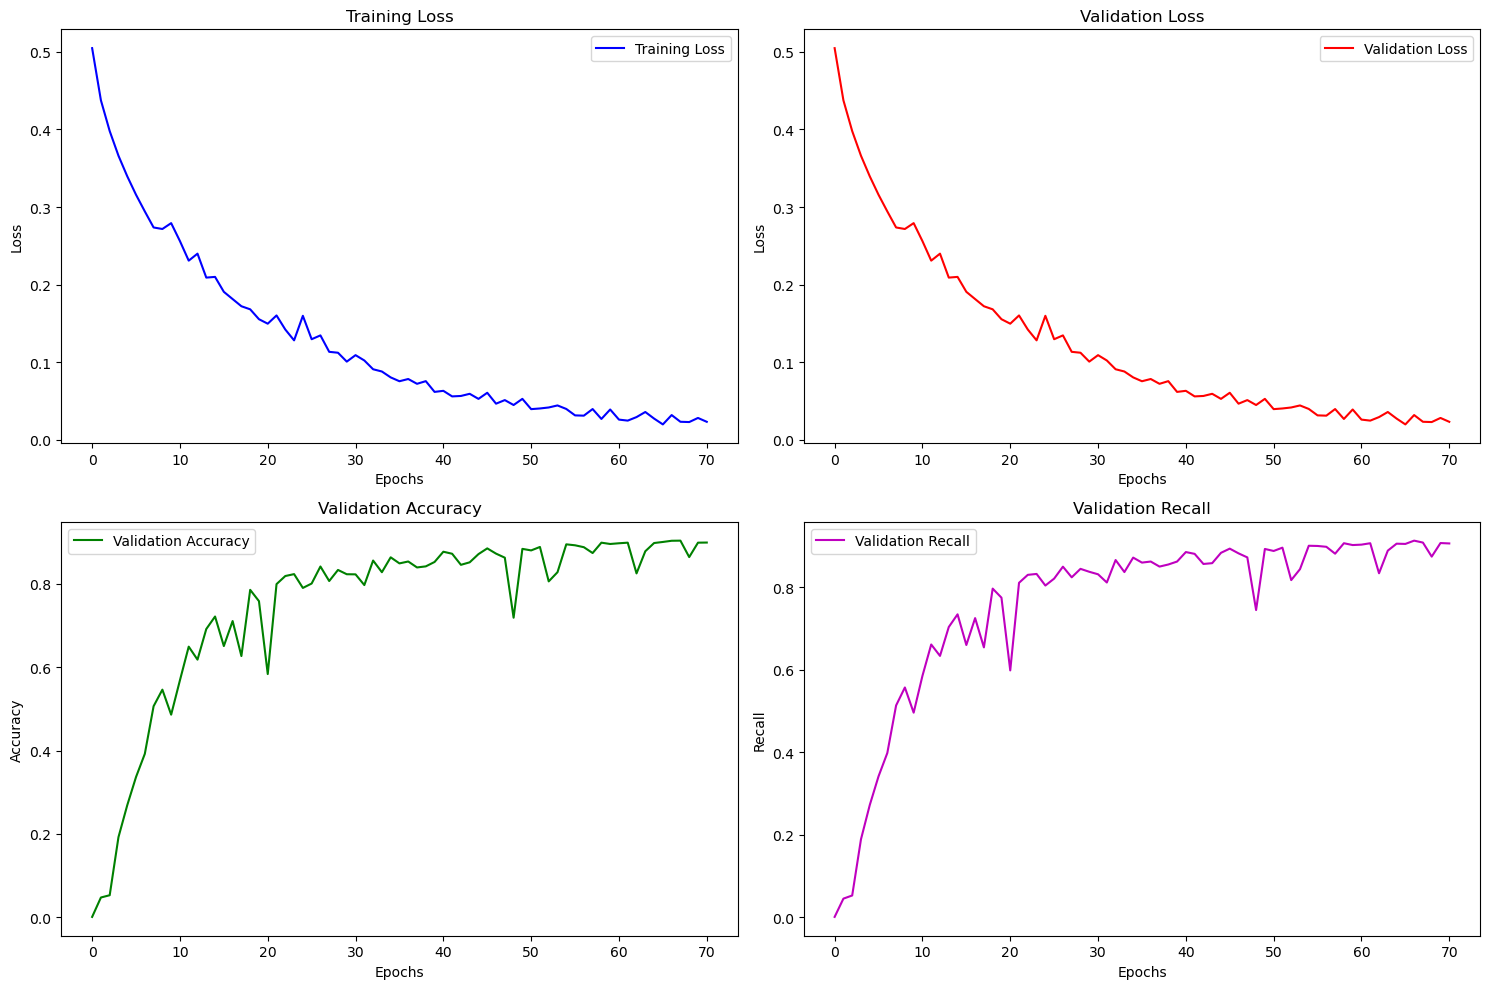

In [9]:
plot_model_metrics(train_loss, val_loss, accs, recalls)

## Learning Rate: 0.0001 | Epochs: 42 

In [ ]:
model_file = "/home/xzodia/dev/emo-gan/outputs/pretrain_discriminator_ESD/pretrain_7/"
model = load_final_model(model_file, model)

In [11]:
val_loss, val_acc, val_prec, val_recall = validate_classifier(model, validation_loader, criterion, hparams)
print_metrics(val_loss, val_acc, val_prec, val_recall)

Validation Loss: 0.0695
Validation Accuracy: 94.2571
Validation Precision: 95.1343
Validation Recall: 94.7509


In [12]:
train_loss, val_loss, accs, recalls = read_train_results(model_file)
print(f"Epochs: {len(train_loss)}")

Epochs: 42


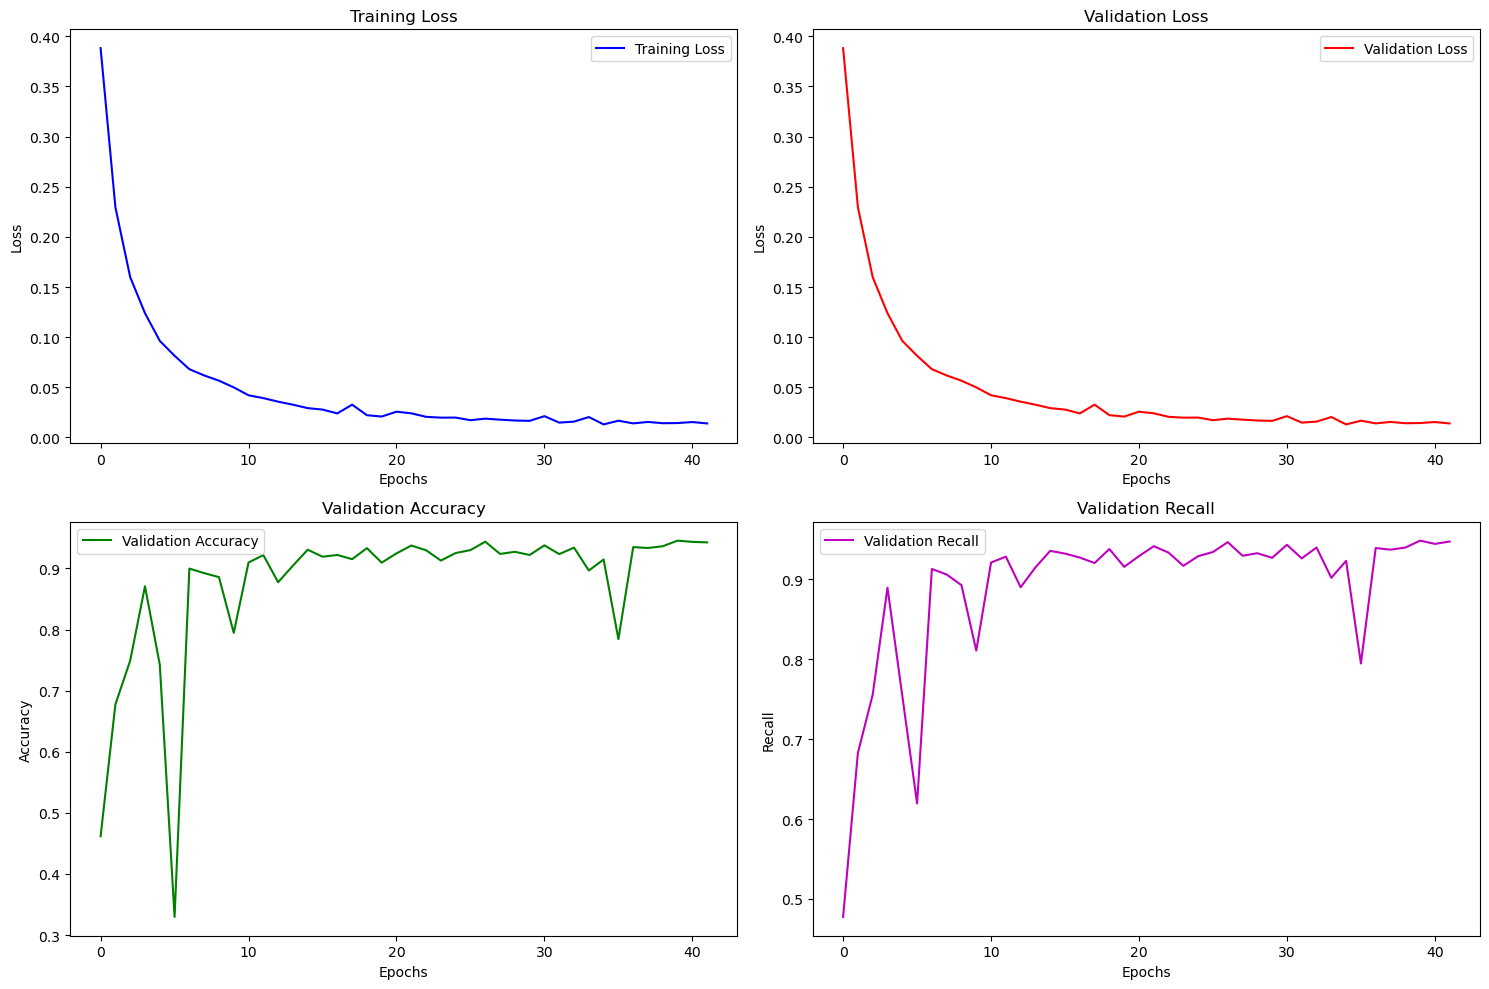

In [13]:
plot_model_metrics(train_loss, val_loss, accs, recalls)

# EMNS Dataset

## Learning Rate: 0.00001 | Epochs: 208

In [6]:
model_file = "/home/xzodia/dev/emo-gan/outputs/pretrain_discriminator_EMNS/pretrain_1/"
model = load_final_model(model_file, model)

In [7]:
val_loss, val_acc, val_prec, val_recall = validate_classifier(model, validation_loader, criterion, hparams)
print_metrics(val_loss, val_acc, val_prec, val_recall)

Validation Loss: 0.2170
Validation Accuracy: 37.5527
Validation Precision: 65.7200
Validation Recall: 42.2034


In [8]:
train_loss, val_loss, accs, recalls = read_train_results(model_file)
print(f"Epochs: {len(train_loss)}")

Epochs: 208


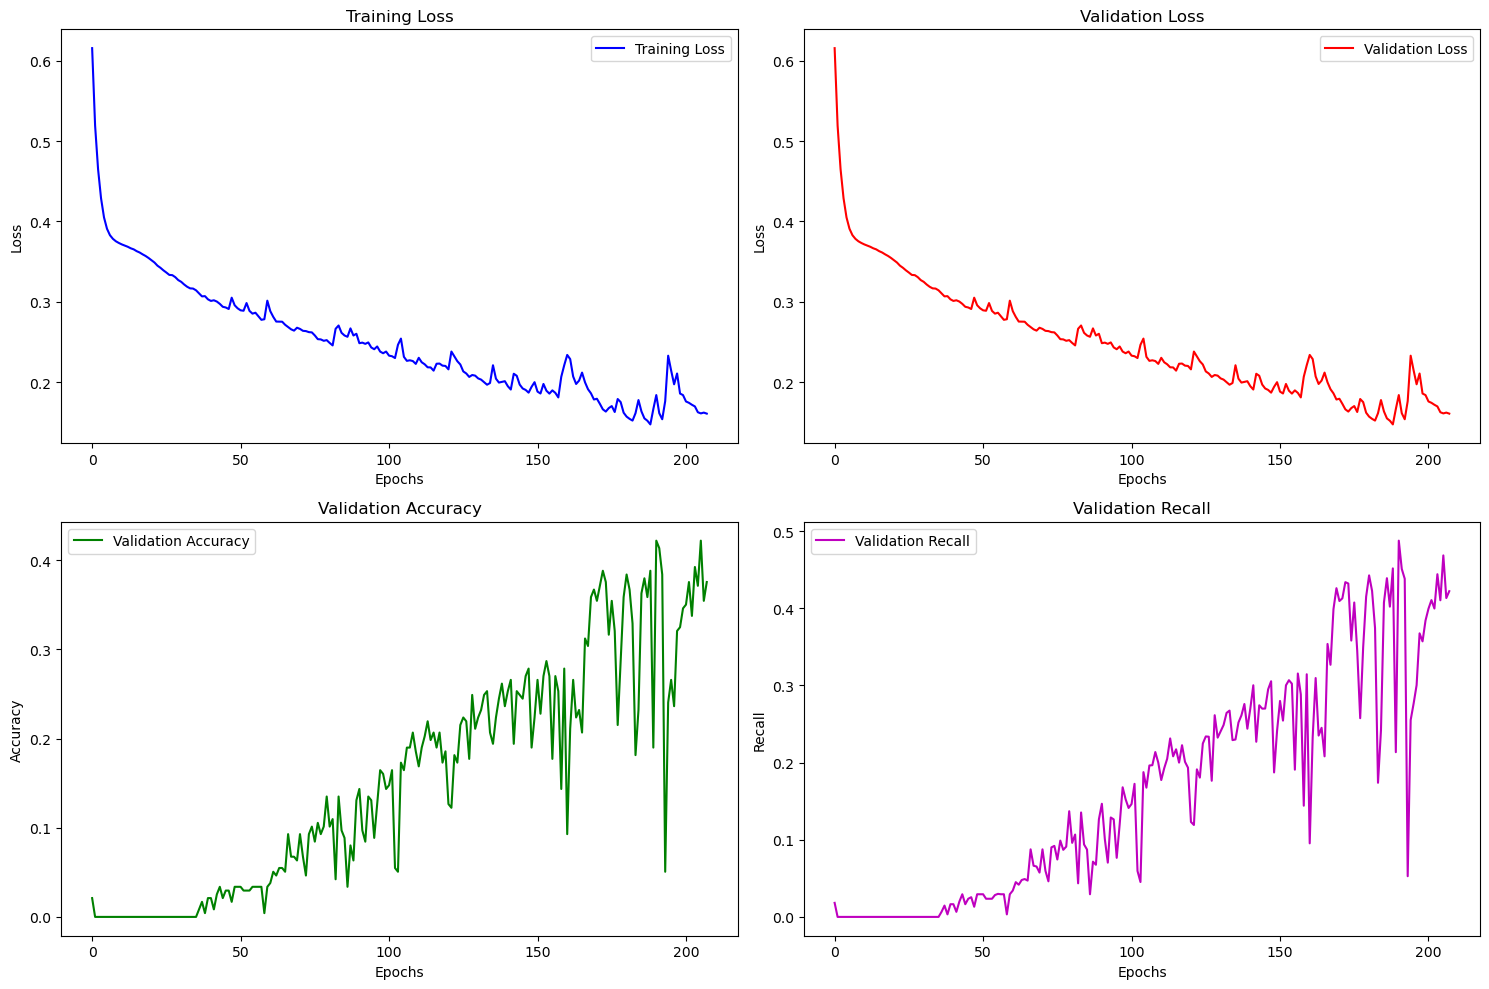

In [9]:
plot_model_metrics(train_loss, val_loss, accs, recalls)

## Learning Rate: 0.0001 | Epochs: 65

In [10]:
model_file = "/home/xzodia/dev/emo-gan/outputs/pretrain_discriminator_EMNS/pretrain_2/"
model = load_final_model(model_file, model)

In [11]:
val_loss, val_acc, val_prec, val_recall = validate_classifier(model, validation_loader, criterion, hparams)
print_metrics(val_loss, val_acc, val_prec, val_recall)

Validation Loss: 0.3287
Validation Accuracy: 45.5696
Validation Precision: 70.6628
Validation Recall: 45.6138


In [12]:
train_loss, val_loss, accs, recalls = read_train_results(model_file)
print(f"Epochs: {len(train_loss)}")

Epochs: 65


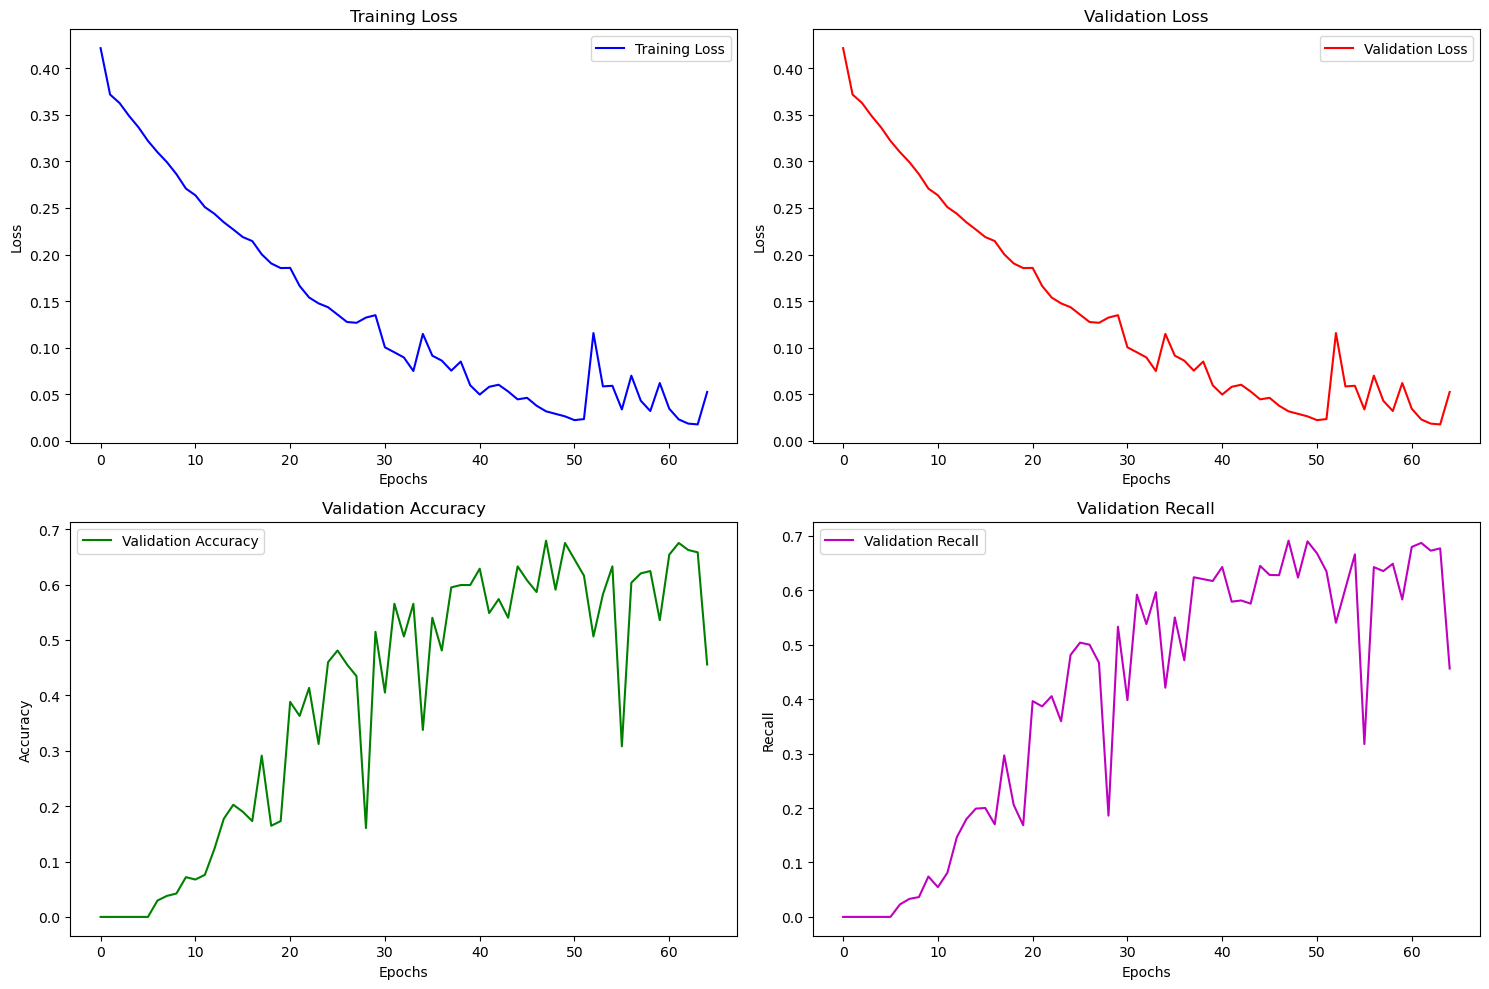

In [13]:
plot_model_metrics(train_loss, val_loss, accs, recalls)